/Users/kai/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


11493376/11490434 [==============================] - 7s 1us/step
(50000, 28, 28) (50000,)


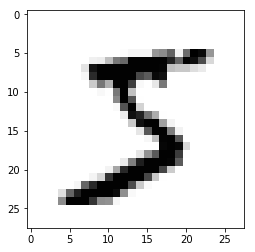

In [1]:
from preprocessed_mnist import load_dataset
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
print(X_train.shape, y_train.shape)
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0], cmap="Greys");

In [2]:
X_train.shape

(50000, 28, 28)

In [3]:
X_test.shape

(10000, 28, 28)

In [4]:
X_train = X_train.reshape([50000, 28*28])
X_test = X_test.reshape([10000, 28*28])

In [5]:
import tensorflow as tf

In [6]:
X = tf.placeholder(tf.float32, shape=(None, 784))
Y = tf.placeholder(tf.float32, shape=(None, 10))

In [7]:
W1 = tf.get_variable("W1",  [784, 100], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.get_variable("b1",  [100], initializer=tf.zeros_initializer())
W2 = tf.get_variable("W2",  [100, 50], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.get_variable("b2",  [50], initializer=tf.zeros_initializer())
W3 = tf.get_variable("W3", [50, 10], initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.get_variable("b3",  [10], initializer=tf.zeros_initializer())

keep_prob = tf.placeholder(tf.float32)

Z1 = tf.matmul(X, W1)+b1
A1 = tf.nn.relu(Z1)
A1 = tf.nn.dropout(A1, keep_prob)
Z2 = tf.matmul(A1, W2)+b2
A2 = tf.nn.relu(Z2)
A2 = tf.nn.dropout(A2, keep_prob)
Z3 = tf.matmul(A2, W3)+b3
A3 = tf.nn.sigmoid(Z3)

Instructions for updating:
Use the retry module or similar alternatives.


In [8]:
def compute_cost(A3, Y):
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y, logits=A3))
    return cost

In [9]:
cost = compute_cost(A3, Y)

init_learning_rate = 0.0001
global_step = tf.Variable(0, trainable=False)
learning_rate = tf.train.exponential_decay(init_learning_rate, global_step, 100, 0.85, staircase=True)

optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



In [10]:
init = tf.global_variables_initializer()

In [11]:
print(y_train.shape)

(50000,)


In [12]:
print(y_test.shape)

(10000,)


In [13]:
print(y_train[0])

5


In [14]:
import numpy as np
y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]

In [15]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


Test cost after 10 epochs: 1.5295322
Test cost after 20 epochs: 1.5084697


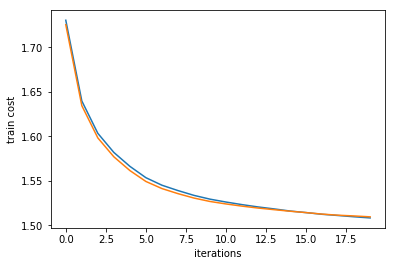

Train Accuracy: 0.94614
Test Accuracy: 0.943


In [18]:
batch_size = 60
epochs = 20

with tf.Session() as sess:
    sess.run(init)
    train_costs = []
    test_costs = []
    for epoch in range(epochs):
        for i in range(0, X_train.shape[0], batch_size):
            sess.run(optimizer, feed_dict={X:X_train[i:i+batch_size], Y:y_train[i: i+batch_size], keep_prob:0.65})
        
        train_costs.append(sess.run(cost, feed_dict={X:X_train, Y:y_train, keep_prob : 1}))
        test_costs.append(sess.run(cost, feed_dict={X:X_test, Y:y_test, keep_prob : 1}))
        
        if epoch%10 == 9:
            print("Test cost after " + str(epoch+1)+ " epochs: "+ str(train_costs[-1]))
    
    iterations = list(range(epochs))
    plt.plot(iterations, train_costs, label='Train')
    plt.plot(iterations, test_costs, label='Test')
    plt.ylabel('train cost')
    plt.xlabel('iterations')
    plt.show()
    
    # Calculate the correct predictions
    predict_op = tf.argmax(Z3, 1)
    correct_prediction = tf.equal(predict_op, tf.argmax(Y, 1))

    # Calculate accuracy on the test set
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    train_accuracy = accuracy.eval({X: X_train, Y: y_train, keep_prob : 1})
    test_accuracy = accuracy.eval({X: X_test, Y: y_test, keep_prob : 1})
    print("Train Accuracy:", train_accuracy)
    print("Test Accuracy:", test_accuracy)